In [ ]:
# Notebook based off of Python Data Science Handbook by Jake VanderPlas.

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')

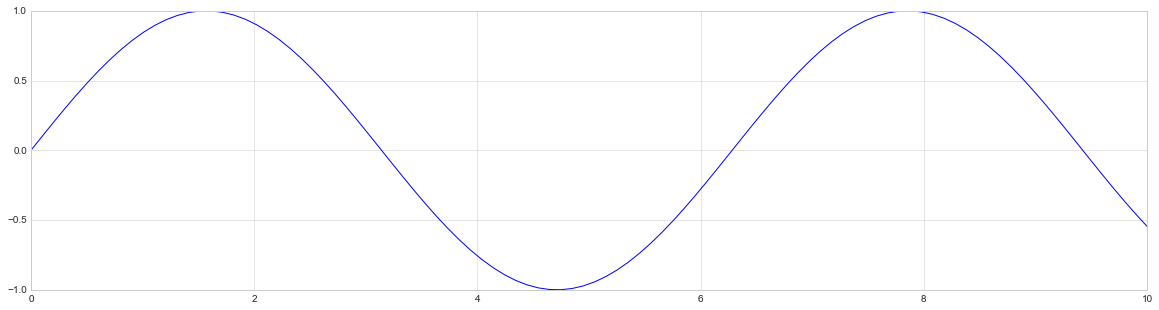

In [44]:
import numpy as np

x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x))
# no graph? 

In [12]:
%matplotlib inline  
# need to issue this for inline graphs in notebook
# need to issue plt.show() in scripts

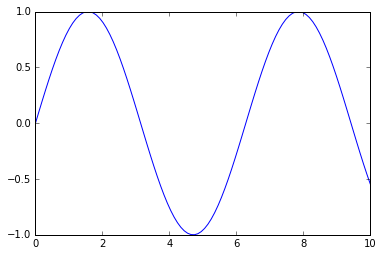

In [18]:
plt.plot(x, np.sin(x))

In [19]:
fig.savefig('sin.png')  # To save figure. Open jupyter root to find file

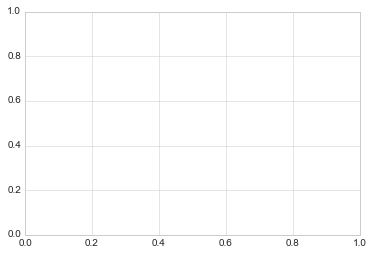

In [22]:
plt.style.use('seaborn-whitegrid')  # lets use a better style

fig = plt.figure()
ax = plt.axes()

The figure contains:

    - axes
    - graphics
    - text
    - labels
    
The axes is what wee see above (the xy graph)

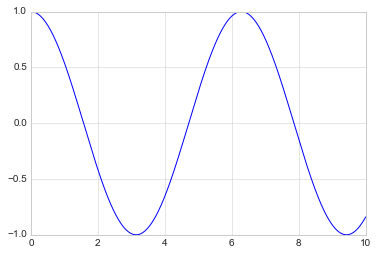

In [26]:
fig = plt.figure()
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.cos(x))  # plot directly to axes

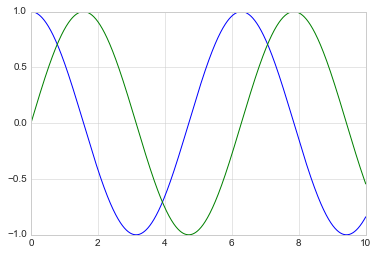

In [27]:
# If we only need one axes, multiple calls to plt.plot will do!
plt.plot(x, np.cos(x))
plt.plot(x, np.sin(x))

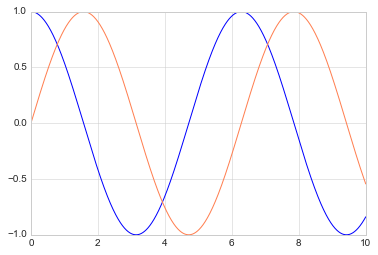

In [28]:
plt.plot(x, np.cos(x), color='blue')
plt.plot(x, np.sin(x), color='coral')

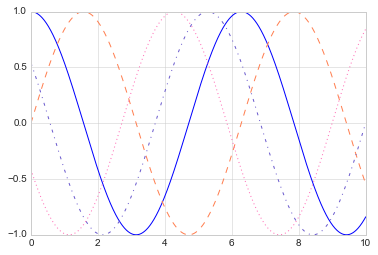

In [31]:
plt.plot(x, np.cos(x), color='blue', linestyle='solid')
plt.plot(x, np.sin(x), color='coral', linestyle='dashed')
plt.plot(x, np.cos(x + 1), color='slateblue', linestyle='dashdot')
plt.plot(x, np.cos(x + 2), color='hotpink', linestyle='dotted')

(-1.5, 1.5)

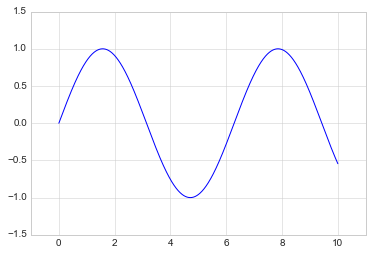

In [34]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

Text(0.5,1,'My Sin Curve')

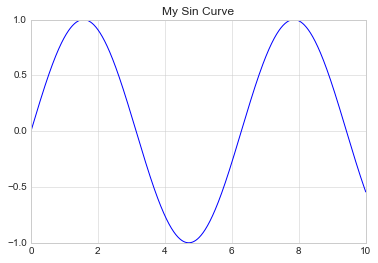

In [35]:
plt.plot(x, np.sin(x))
plt.title('My Sin Curve')

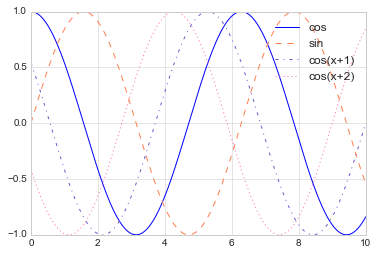

In [37]:
plt.plot(x, np.cos(x), color='blue', linestyle='solid', label='cos')
plt.plot(x, np.sin(x), color='coral', linestyle='dashed', label='sin')
plt.plot(x, np.cos(x + 1), color='slateblue', linestyle='dashdot', label='cos(x+1)')
plt.plot(x, np.cos(x + 2), color='hotpink', linestyle='dotted', label='cos(x+2)')
plt.legend()

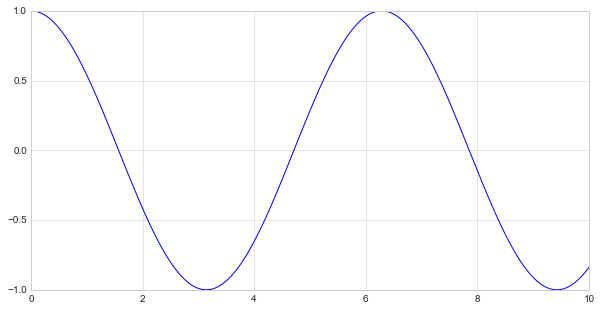

In [43]:
plt.figure(figsize=(10, 5))  # change size of figure
plt.plot(x, np.cos(x), color='blue', linestyle='solid', label='cos')

#### Scatter!

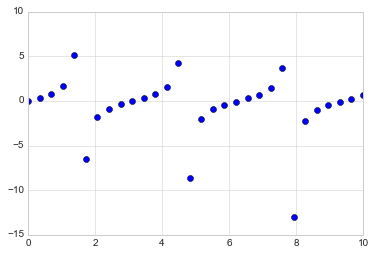

In [60]:
x = np.linspace(0, 10, 30)
y = np.tan(x)

plt.plot(x, y, 'o')  
# presence of third arg denotes scatter plot and type of scatter marker/symbol

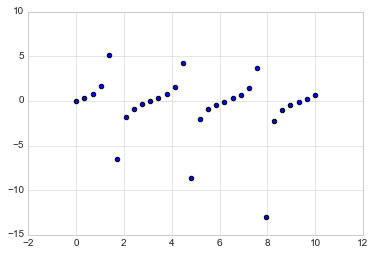

In [62]:
plt.scatter(x, y, marker='o')

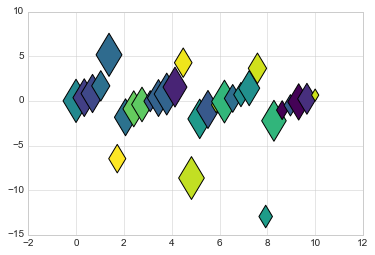

In [80]:
rng = np.random.RandomState(50)

plt.scatter(
    x, 
    y, 
    c=rng.rand(len(x)),  # colors
    s=rng.rand(len(x)) * 1000,  # sizes
    marker='d',  # diamond
    cmap='viridis',  # color map (ie. numbers to colors mapping)
)

<Container object of 3 artists>

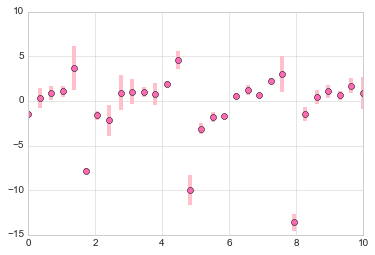

In [97]:
plt.errorbar(
    x, 
    y + np.random.randn(30),
    yerr=np.random.randn(30),  # error for each point
    fmt='o',
    color='hotpink',
    ecolor='pink',
    elinewidth=4,
    capsize=0,
)

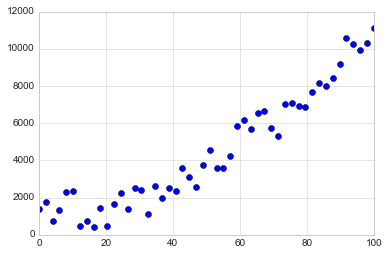

In [216]:
np.random.seed(3)

x = np.linspace(0, 100)
y = (x ** 2) + (2500 * np.random.rand(len(x)))

plt.plot(x, y, 'o')

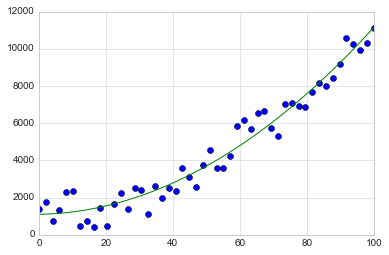

In [217]:
coeffs = np.polyfit(x, y, 2)
yfit = np.poly1d(coeffs)(x)

plt.plot(x, y, 'o')
plt.plot(x, yfit)

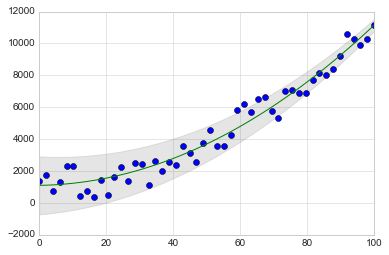

In [218]:
# Get error at beginning and end of fit. 
# Exaggerate error for qualitative investigation.
dy = np.linspace(
    (yfit - y)[:5].mean() * 5,  
    (yfit - y)[-5:].mean() * 5,
    len(x),
)

plt.plot(x, y, 'o')
plt.plot(x, yfit)
plt.fill_between(
    x, 
    yfit + dy, 
    yfit - dy,
    color='grey',
    alpha=0.2,
)

#### Historgrams

(array([  1.,   0.,   3.,   3.,   3.,   5.,  14.,  21.,  23.,  37.,  48.,
         67.,  80.,  92., 104.,  79.,  82.,  64.,  78.,  66.,  42.,  29.,
         22.,  18.,   6.,   7.,   3.,   2.,   0.,   1.]),
 array([-3.50613655, -3.28073211, -3.05532767, -2.82992324, -2.6045188 ,
        -2.37911436, -2.15370992, -1.92830548, -1.70290104, -1.4774966 ,
        -1.25209216, -1.02668772, -0.80128328, -0.57587884, -0.35047441,
        -0.12506997,  0.10033447,  0.32573891,  0.55114335,  0.77654779,
         1.00195223,  1.22735667,  1.45276111,  1.67816555,  1.90356999,
         2.12897443,  2.35437886,  2.5797833 ,  2.80518774,  3.03059218,
         3.25599662]),
 <a list of 30 Patch objects>)

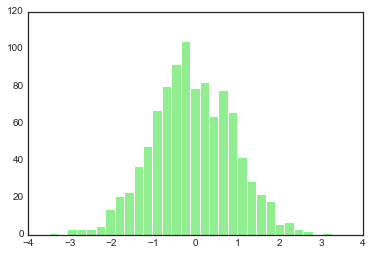

In [224]:
plt.style.use('seaborn-white')  # white background / no grid

plt.hist(
    np.random.randn(1000),
    bins=30,
    edgecolor='white',
    color='lightgreen',
)

In [225]:
# Download data (1.3 GB, 2,445,354 rows) Excel cries at 1,048,576 rows.
# !wget https://data.cityofnewyork.us/api/views/v9f2-aixf/rows.csv -O 311_Service_Requests__2017_.csv
# !gzip 311_Service_Requests__2017_.csv  # save some space

In [8]:
import pandas as pd

import time
t0 = time.time()

# Takes about 6 minutes to load into memory, 
# most of that time is due to datetime parsing
df = pd.read_csv(
    '311_Service_Requests__2017_.csv.gz', 
    low_memory=True,
    parse_dates=['Created Date'],
)

ttoal = time.time() - t0
print('Load time (min):', int(ttoal / 60))

df.info()

/Users/paul/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (8,17,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


12.0253222544988
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445353 entries, 0 to 2445352
Data columns (total 39 columns):
Unique Key                        int64
Created Date                      datetime64[ns]
Closed Date                       object
Agency                            object
Agency Name                       object
Complaint Type                    object
Descriptor                        object
Location Type                     object
Incident Zip                      object
Incident Address                  object
Street Name                       object
Cross Street 1                    object
Cross Street 2                    object
Intersection Street 1             object
Intersection Street 2             object
Address Type                      object
City                              object
Landmark                          object
Facility Type                     object
Status                            object
Due Date                          object
Re

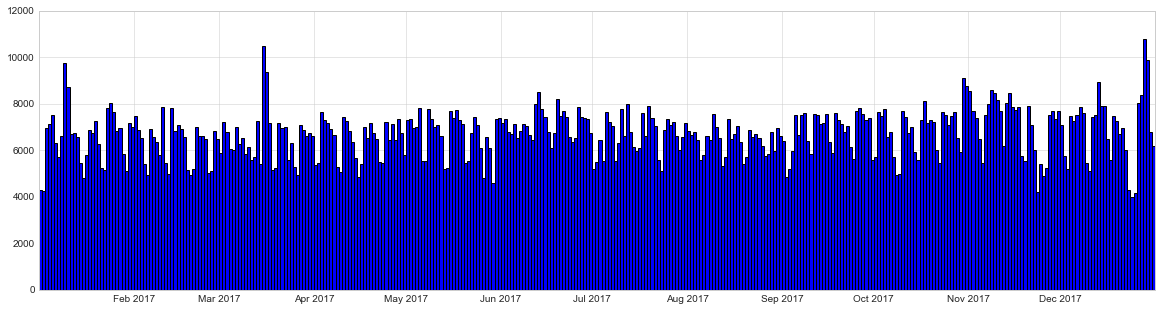

In [13]:
plt.style.use('seaborn-whitegrid')

plt.rcParams["figure.figsize"] = (20, 5)

df['Created Date'].hist(bins=365)

In [22]:
call_counts_df = df.groupby(df['Created Date'].dt.date)['Unique Key'].count()
call_counts_df.head()

Created Date
2017-01-01    4228
2017-01-02    4221
2017-01-03    6987
2017-01-04    7134
2017-01-05    7514
Name: Unique Key, dtype: int64

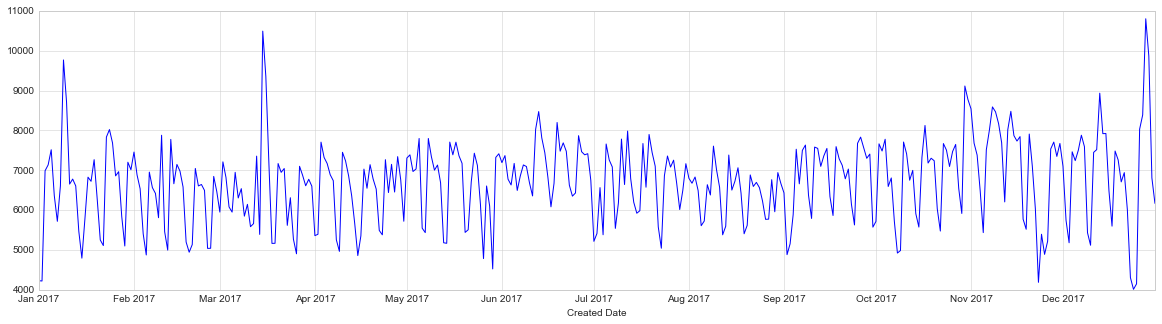

In [24]:
call_counts_df.plot()

#### Invetigation of graph data

In [32]:
call_counts_df.sort_values(
    ascending=False,
    inplace=True,
)
call_counts_df[call_counts_df > 9000]  # most impacted days

Created Date
2017-12-28    10800
2017-03-15    10490
2017-12-29     9866
2017-01-09     9767
2017-03-16     9354
2017-10-30     9113
Name: Unique Key, dtype: int64

In [33]:
call_counts_df.iloc[-5:]  # least impacted days

Created Date
2017-01-01    4228
2017-01-02    4221
2017-11-23    4187
2017-12-25    4149
2017-12-24    4012
Name: Unique Key, dtype: int64

In [114]:
high_days = call_counts_df[call_counts_df > 9000].index.astype(np.datetime64).date
print(high_days)

low_days = call_counts_df.iloc[-5:].index.astype(np.datetime64).date
print(low_days)

[datetime.date(2017, 12, 28) datetime.date(2017, 3, 15)
 datetime.date(2017, 12, 29) datetime.date(2017, 1, 9)
 datetime.date(2017, 3, 16) datetime.date(2017, 10, 30)]
[datetime.date(2017, 1, 1) datetime.date(2017, 1, 2)
 datetime.date(2017, 11, 23) datetime.date(2017, 12, 25)
 datetime.date(2017, 12, 24)]


In [69]:
high_call_days_df = df[df['Created Date'].dt.date.isin(high_days)]
high_call_days_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
48776,35211272,2017-01-09,01/13/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,1-2 Family Dwelling,11206,237 BOERUM STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.706364,-73.938075,"(40.70636403131334, -73.9380749089507)"
48777,35211162,2017-01-09,01/04/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,10472,1149 STRATFORD AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.827537,-73.875202,"(40.82753736298043, -73.87520157297476)"
48778,35210907,2017-01-09,01/11/2017 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,3+ Family Apt. Building,11203,362 LINDEN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.652856,-73.945765,"(40.65285580217192, -73.9457648525832)"
48779,35210895,2017-01-09,01/10/2017 11:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,11101,46-35 VERNON BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.745994,-73.952997,"(40.74599440623777, -73.95299713913137)"
48780,35210882,2017-01-09,01/09/2017 12:00:01 AM,DOHMH,Department of Health and Mental Hygiene,Food Poisoning,3 or More,Restaurant/Bar/Deli/Bakery,10019,325 WEST 57 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767107,-73.983783,"(40.767107200510736, -73.98378349399083)"


In [121]:
for date in high_days:
    # Let's use high_call_days_df so we don't have to iterate over df again
    date_df = high_call_days_df[high_call_days_df['Created Date'].dt.date == date]
    complaints = date_df['Complaint Type'].str.lower().value_counts().index[0]
    print(date, complaints)

2017-12-28 heat/hot water
2017-03-15 snow
2017-12-29 heat/hot water
2017-01-09 heat/hot water
2017-03-16 snow
2017-10-30 heat/hot water


In [ ]:
# 2017-12-28 Coldest day of year
# 2017-03-15 Bust of snow storm: 
# http://thestarryeye.typepad.com/weather/2017/01/2017-weather-highlights-in-new-york.html
# 2017-12-29 Day after coldest day of year
# 2017-01-09 Nothing special
# 2017-03-16 Bust storm bust
# 2017-10-30 Rain storm day before

In [115]:
low_call_days_df = df[df['Created Date'].dt.date.isin(low_days)]
low_call_days_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,35139948,2017-01-01 00:00:59,01/06/2017 03:01:43 PM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10467,3311 PARKSIDE PLACE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.876467,-73.872604,"(40.87646714081217, -73.87260382678964)"
1,35140478,2017-01-01 00:01:43,01/01/2017 03:55:49 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11368,37-17 111 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.753707,-73.856918,"(40.75370747222585, -73.85691769836258)"
2,35138317,2017-01-01 00:02:54,01/01/2017 12:46:54 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11209,255 79 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.628867,-74.030215,"(40.628866957984805, -74.03021507491445)"
3,35139300,2017-01-01 00:03:41,01/01/2017 03:49:13 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10040,60 THAYER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.863609,-73.927177,"(40.8636089229268, -73.92717651087838)"
4,35143952,2017-01-01 00:03:42,01/03/2017 08:54:53 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10470,4385 VIREO AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.901317,-73.862731,"(40.901317206845796, -73.86273139185647)"


In [120]:
for date in low_days:
    # Let's use high_call_days_df so we don't have to iterate over df again
    date_df = low_call_days_df[low_call_days_df['Created Date'].dt.date == date]
    complaints = date_df['Complaint Type'].str.lower().value_counts().index[0]
    print(date, complaints)

2017-01-01 noise - residential
2017-01-02 heat/hot water
2017-11-23 heat/hot water
2017-12-25 noise - residential
2017-12-24 noise - residential


In [ ]:
# 2017-01-01 New Years Day
# 2017-01-02 New Years Day observered
# 2017-11-23 Thanksgiving
# 2017-12-25 Christmas
# 2017-12-24 Christmas Eve

In [126]:
df['Complaint Type'].str.lower().value_counts()
# noise - residential
# heat/hot water 
# ...
# tanning
# trans fat

noise - residential                    230152
heat/hot water                         213521
illegal parking                        146122
blocked driveway                       136097
street condition                        93265
street light condition                  84195
unsanitary condition                    79282
noise - street/sidewalk                 73085
water system                            65094
noise                                   60171
paint/plaster                           57076
plumbing                                56348
noise - commercial                      47394
request large bulky item collection     46614
sanitation condition                    38937
missed collection (all materials)       36260
traffic signal condition                36178
dirty conditions                        35887
rodent                                  35046
door/window                             35012
derelict vehicle                        35007
derelict vehicles                 

In [128]:
# Complaints about noise
df['Complaint Type'].str.lower().str.count('noise').sum()

447090